## 1. 커뮤니티 간 코사인 유사도 분석

참고한 코드: https://jeonjoon.tistory.com/m/30

커뮤니티에서 환승연애 관련하여 언급되고 있는 내용들을 가지고 코사인 유사도 분석 시행.
커뮤니티별 언급 내용에 차이가 있는지 여부를 확인하고, 유사도의 정도 확인 가능.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 각 커뮤니티 데이터 불러오기
import pandas as pd
file = open('./data/cosine/트윗내용.txt', 'r', encoding = 'utf-8')
lines = file.readlines()  
doc1 = ' '.join(lines)

file = open('./data/cosine/디시내용.txt', 'r', encoding = 'utf-8')
lines = file.readlines()  
doc2 = ' '.join(lines)

file = open('./data/cosine/더쿠내용.txt', 'r', encoding = 'utf-8')
lines = file.readlines()  
doc3 = ' '.join(lines)

file = open('./data/cosine/인스티즈내용.txt', 'r', encoding = 'utf-8')
lines = file.readlines()
doc4 = ' '.join(lines)

In [ ]:
# 각 텍스트간 코사인 유사도 구하기

corpus = [doc1, doc2, doc3, doc4] # n개의 데이터를 넣을 수 있다
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).todense()


print("Similarity between '트위터' and '디시인사이드': ", cosine_similarity(X[0], X[1]))
print("Similarity between '트위터' and '더쿠': ", cosine_similarity(X[0], X[2]))
print("Similarity between '트위터' and '인스티즈': ", cosine_similarity(X[0], X[3]))
print("Similarity between '디시인사이드' and '더쿠': ", cosine_similarity(X[1], X[2]))
print("Similarity between '디시인사이드' and '인스티즈': ", cosine_similarity(X[1], X[3]))
print("Similarity between '더쿠' and '인스티즈': ", cosine_similarity(X[2], X[3]))

Similarity between '트위터' and '디시인사이드':  [[0.02652615]]
Similarity between '트위터' and '더쿠':  [[0.20220606]]
Similarity between '트위터' and '인스티즈':  [[0.4288147]]
Similarity between '디시인사이드' and '더쿠':  [[0.0161471]]
Similarity between '디시인사이드' and '인스티즈':  [[0.03837528]]
Similarity between '더쿠' and '인스티즈':  [[0.18436495]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

In [ ]:
# 행렬 만들기

cosine_similarity( X , X )
cosine_similarity( X )

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[1.        , 0.02652615, 0.20220606, 0.4288147 ],
       [0.02652615, 1.        , 0.0161471 , 0.03837528],
       [0.20220606, 0.0161471 , 1.        , 0.18436495],
       [0.4288147 , 0.03837528, 0.18436495, 1.        ]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


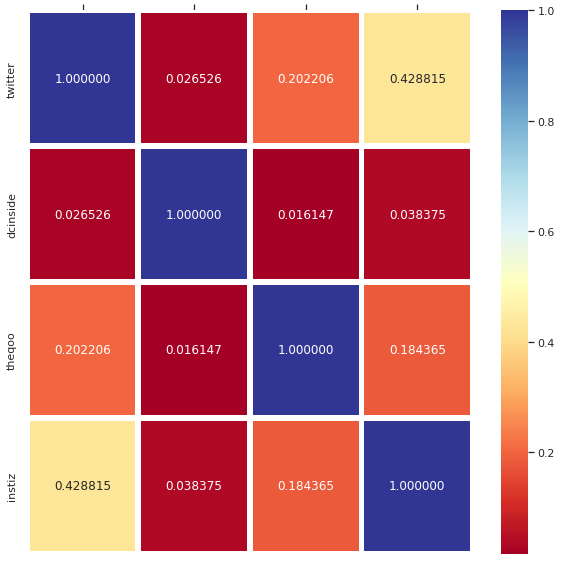

In [ ]:
# 시각화하기

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

result = pd.DataFrame(cosine_similarity( X ))

result.columns = ['twitter', 'dcinside', 'theqoo', 'instiz']
result.index = ['twitter', 'dcinside', 'theqoo', 'instiz']

plt.figure(figsize=(10, 10))

sns.heatmap(result, annot=True, fmt='f', linewidths=5, cmap='RdYlBu', )

sns.set(font_scale=1)
plt.tick_params(top=True, bottom=False, labeltop=False, labelbottom=False) # Let the horizontal axes labeling appear on top.
plt.show()

Similarity between '트위터' and '디시인사이드':  0.02652615

Similarity between '트위터' and '더쿠':  0.20220606

Similarity between '트위터' and '인스티즈':  0.4288147

Similarity between '디시인사이드' and '더쿠':  0.0161471

Similarity between '디시인사이드' and '인스티즈':  0.03837528

Similarity between '더쿠' and '인스티즈':  0.18436495

=> 전반적으로 커뮤니티별 유사도가 크지는 않음.
=> 두드러지는 건, 디시인사이드와 타 커뮤니티 간 유사도가 0에 가깝다는 것(거의 독립적이다)
=> 그나마 트위터와 인스티즈간 유사도가 높은 편.

## 2. 커뮤니티 + 언론 텍스트 유사도 분석

In [ ]:
#1번코드 실행 후 실행해야함. 1번 코드에 언론 데이터만 추가한 것.
file = open('./data/cosine/뉴스내용.txt', 'r', encoding = 'utf-8')
lines = file.readlines()
doc5 = ' '.join(lines)

In [ ]:
corpus = [doc1, doc2, doc3, doc4, doc5] # n개의 데이터를 넣을 수 있다
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).todense()


print("Similarity between '트위터' and '디시인사이드': ", cosine_similarity(X[0], X[1]))
print("Similarity between '트위터' and '더쿠': ", cosine_similarity(X[0], X[2]))
print("Similarity between '트위터' and '인스티즈': ", cosine_similarity(X[0], X[3]))
print("Similarity between '트위터' and '언론': ", cosine_similarity(X[0], X[4]))
print("Similarity between '디시인사이드' and '더쿠': ", cosine_similarity(X[1], X[2]))
print("Similarity between '디시인사이드' and '인스티즈': ", cosine_similarity(X[1], X[3]))
print("Similarity between '디시인사이드' and '언론': ", cosine_similarity(X[1], X[4]))
print("Similarity between '더쿠' and '인스티즈': ", cosine_similarity(X[2], X[3]))
print("Similarity between '더쿠' and '언론': ", cosine_similarity(X[2], X[4]))
print("Similarity between '인스티즈' and '언론': ", cosine_similarity(X[3], X[4]))

Similarity between '트위터' and '디시인사이드':  [[0.02589661]]
Similarity between '트위터' and '더쿠':  [[0.18806956]]
Similarity between '트위터' and '인스티즈':  [[0.41305477]]
Similarity between '트위터' and '언론':  [[0.27624658]]
Similarity between '디시인사이드' and '더쿠':  [[0.0151744]]
Similarity between '디시인사이드' and '인스티즈':  [[0.03630949]]
Similarity between '디시인사이드' and '언론':  [[0.03091607]]
Similarity between '더쿠' and '인스티즈':  [[0.17701061]]
Similarity between '더쿠' and '언론':  [[0.12414635]]
Similarity between '인스티즈' and '언론':  [[0.18090902]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

In [ ]:
cosine_similarity( X , X )
cosine_similarity( X )

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[1.        , 0.02589661, 0.18806956, 0.41305477, 0.27624658],
       [0.02589661, 1.        , 0.0151744 , 0.03630949, 0.03091607],
       [0.18806956, 0.0151744 , 1.        , 0.17701061, 0.12414635],
       [0.41305477, 0.03630949, 0.17701061, 1.        , 0.18090902],
       [0.27624658, 0.03091607, 0.12414635, 0.18090902, 1.        ]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


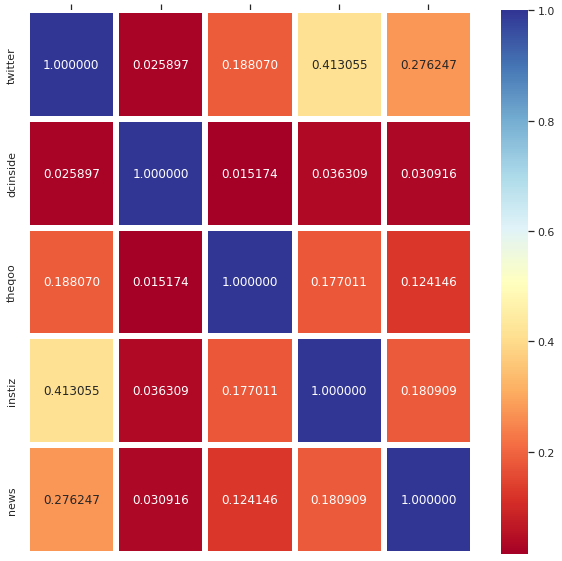

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

result = pd.DataFrame(cosine_similarity( X ))

result.columns = ['twitter', 'dcinside', 'theqoo', 'instiz', 'news']
result.index = ['twitter', 'dcinside', 'theqoo', 'instiz', 'news']

plt.figure(figsize=(10, 10))

sns.heatmap(result, annot=True, fmt='f', linewidths=5, cmap='RdYlBu', )

sns.set(font_scale=1)
plt.tick_params(top=True, bottom=False, labeltop=False, labelbottom=False) # Let the horizontal axes labeling appear on top.
plt.show()

=> 전반적으로 커뮤니티와 언론간 유사도 낮음... 그나마 트위터가 높은데 이마저도 코사인유사도 0.3이하임. 언론에서 전달되는 내용이 대중의 실질적인 반응과는 차이가 있음을 알 수 있음.